<a href="https://colab.research.google.com/github/sakinahindriyani/rps_ml_dicoding/blob/master/FinalTask_ML_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Hello! My name is Sakinah Indriyani. In this project I built a model to predict Paper Rock Scissor Image Classification using Neural Network with TensorFlow as a Final Project from Dicoding Indonesia. This project will also help me to give me a better understanding how Deep Learning works in Image Classification works.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dicoding-final

/content/drive/MyDrive/dicoding-final


#Import Library

Import the library that will be needed for this project.

In [ ]:
!pip install split-folders

In [ ]:
#Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import splitfolders
import datetime
from google.colab import files
from tensorflow.keras.preprocessing import image

# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!nvidia-smi

Tue Jun 15 17:27:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
a = datetime.datetime.now().replace(microsecond=0)

#Load Dataset
Load the dataset using the wget command

In [ ]:
!wget -c https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-15 17:27:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



In [ ]:
!unzip -n -q rockpaperscissors.zip

Initiate Parameter

In [ ]:
path = "/content/drive/MyDrive/dicoding-final/rockpaperscissors/rps-cv-images" #@param {type:"string"}
batch_size =  64#@param {type:"integer"}
image_size =  100#@param {type:"integer"}

In [ ]:
data_paper = path + '/paper'
data_rock = path + '/rock'
data_scissors = path + '/scissors'

Check the number of data

In [ ]:
print ('the number of paper data - ', len(os.listdir(data_paper)))
print ('the number of rock data - ', len(os.listdir(data_rock)))
print ('the number of scissors data - ', len(os.listdir(data_scissors)))
print ('total of data - ', (len(os.listdir(data_paper))+len(os.listdir(data_rock))+len(os.listdir(data_scissors))))

the number of paper data -  712
the number of rock data -  726
the number of scissors data -  750
total of data -  2188


Use Split Folder to seperate the Train and Validation Data

In [ ]:
out_path = '/content/drive/MyDrive/dicoding-final/rps'
if not os.path.exists(out_path):
  print('Split folders')
  splitfolders.ratio(path, output=out_path, seed=1337, ratio=(.6, .4))

In [ ]:
base_path = out_path
train_paper = base_path + '/train/paper'
train_rock = base_path + '/train/rock'
train_scissors = base_path + '/train/scissors'
print('total of train data - ', (len(os.listdir(train_paper))+len(os.listdir(train_rock))+len(os.listdir(train_scissors))))

total of train data -  1312


##Preprocessing

Use ImageDataGenerator to preprocess the image dataset

In [ ]:
data_generator = ImageDataGenerator(rescale= 1.0/255.0, validation_split=0.4)

In [ ]:
training_data = data_generator.flow_from_directory(directory = path,
                                                   target_size = (image_size, image_size),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle=True,
                                                   subset='training',
                                                   seed=1)
validation_data = data_generator.flow_from_directory(directory = path,
                                                     target_size = (image_size, image_size),
                                                     batch_size = batch_size,
                                                     class_mode = 'categorical',
                                                     shuffle=True,
                                                     subset='validation',
                                                     seed=1)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


*Notes*

*Since I found that using ImageDataGenerator giving me the exact number of train and validation data for this project, so I won't using the data that I split from SplitFolder. I'm experimenting both ways to know which function that give me the right amount of data.*



Plot the example of images

In [ ]:
class_names = ['paper','rock','scissors']
cls = np.array(class_names)
image_train, label_train = next(training_data)
image_val, label_val = next(validation_data)

In [ ]:
def show_image(image, label):
    plt.figure(figsize=(10,10))
    i = 1
    for n in range(9):
        plt.subplot(3, 3, i)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[n], cmap=plt.cm.binary)
        plt.title(cls[label[n]==1][0])
        i += 1
    return plt.show()

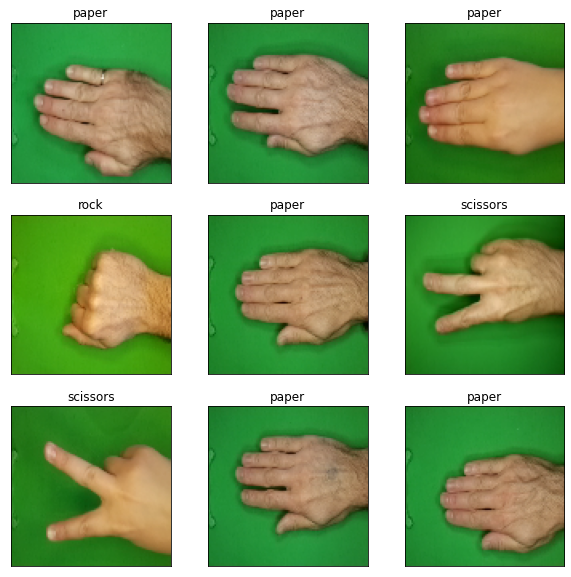

In [ ]:
show_image(image_train, label_train)

## Define Model

In [ ]:
# preparing the layers in the Convolutional Deep Neural Network
def load_model():
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(rate = 0.3))
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(rate = 0.2))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(rate = 0.15))
  model.add(Flatten())
  model.add(Dense(units = 218, activation = 'relu'))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = load_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
fitted_model = model.fit(training_data,
                         steps_per_epoch = 1314 // batch_size,
                         epochs = 50,
                         validation_data = validation_data,
                         validation_steps = 874 // batch_size,
                         callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
20/20 [==============================] - 499s 24s/step - loss: 1.2869 - accuracy: 0.4704 - val_loss: 0.9028 - val_accuracy: 0.5541
Epoch 2/50
20/20 [==============================] - 6s 321ms/step - loss: 0.7219 - accuracy: 0.7144 - val_loss: 0.6115 - val_accuracy: 0.7464
Epoch 3/50
20/20 [==============================] - 6s 321ms/step - loss: 0.5619 - accuracy: 0.7880 - val_loss: 0.4791 - val_accuracy: 0.8161
Epoch 4/50
20/20 [==============================] - 6s 319ms/step - loss: 0.3631 - accuracy: 0.8696 - val_loss: 0.2888 - val_accuracy: 0.9375
Epoch 5/50
20/20 [==============================] - 6s 319ms/step - loss: 0.2210 - accuracy: 0.9248 - val_loss: 0.2394 - val_accuracy: 0.9303
Epoch 6/50
20/20 [==============================] - 6s 321ms/step - loss: 0.1537 - accuracy: 0.9416 - val_loss: 0.1681 - val_accuracy: 0.9483
Epoch 7/50
20/20 [==============================] - 6s 323ms/step - loss: 0.1207 - accuracy: 0.9536 - val_loss: 0.1549 - val_accuracy: 0.9567
Epoch 

In [ ]:
model.evaluate(validation_data, steps=874//batch_size)

13/13 [==============================] - 2s 185ms/step - loss: 0.1153 - accuracy: 0.9712


[0.11530447006225586, 0.9711538553237915]

## Plot the Accuracy Meter

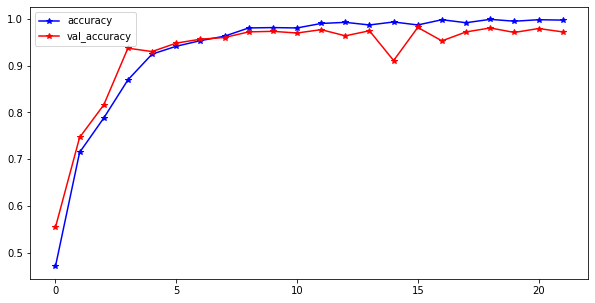

In [ ]:
# plotting accuracy and validation accuracy
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
plt.legend()

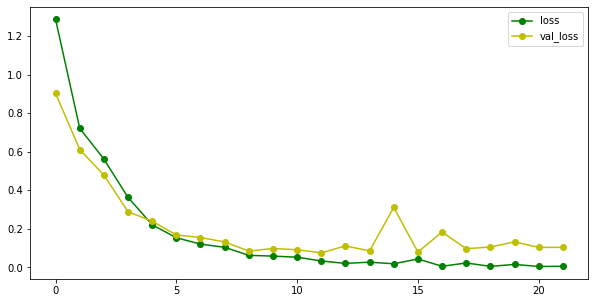

In [ ]:
plt.figure(figsize=(10,5)) 
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

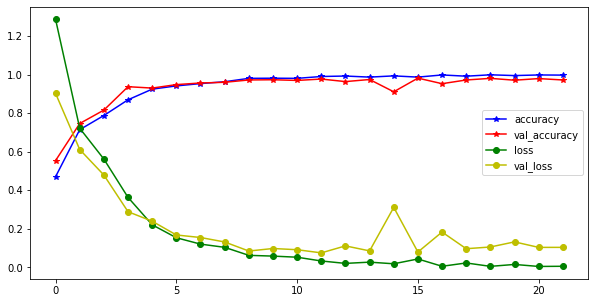

In [ ]:
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

Predict one picture

Saving guntink.jpg to guntink.jpg
guntink.jpg
Scissors


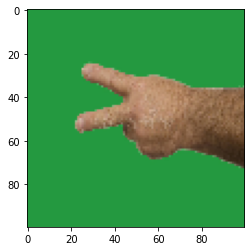

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(image_size, image_size))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissors')

## Try with Data Augmentation

In [ ]:
data_aug_generator = ImageDataGenerator(rescale=1.0/255.0,
                                        vertical_flip=True,
                                        horizontal_flip=True,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        rotation_range=40,
                                        fill_mode='nearest', 
                                        validation_split=0.4)

In [ ]:
path = '/content/drive/MyDrive/dicoding-final/rockpaperscissors/rps-cv-images'

training_data_aug = data_aug_generator.flow_from_directory(directory = path,
                                                           target_size = (image_size, image_size),
                                                           batch_size = batch_size,
                                                           class_mode = 'categorical',
                                                           shuffle=True,
                                                           subset='training',
                                                           seed=1)

Found 1314 images belonging to 3 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(25,25))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
augmented_images = [training_data_aug[0][0][0] for i in range(5)]

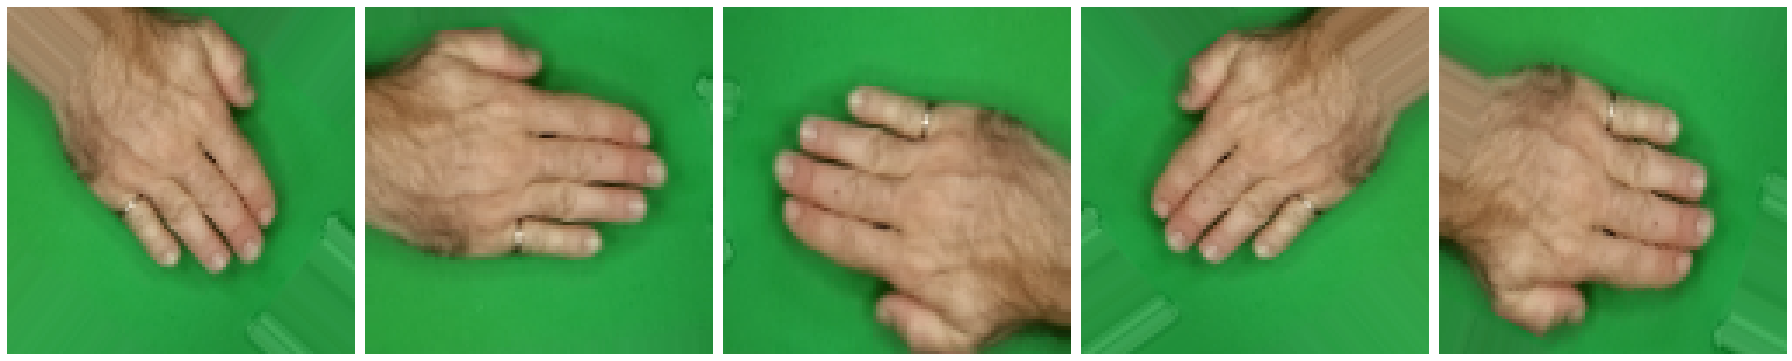

In [ ]:
plotImages(augmented_images)

In [ ]:
# preparing the layers in the Convolutional Deep Neural Network
model_aug = load_model()

model_aug.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)       

In [ ]:
fitted_model = model_aug.fit(training_data_aug,
                             steps_per_epoch = 1314 // batch_size,
                             epochs = 50,
                             validation_data = validation_data,
                             validation_steps = 874 // batch_size,
                             callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
20/20 [==============================] - 10s 460ms/step - loss: 1.1901 - accuracy: 0.3648 - val_loss: 1.0832 - val_accuracy: 0.5084
Epoch 2/50
20/20 [==============================] - 8s 430ms/step - loss: 1.0436 - accuracy: 0.4760 - val_loss: 0.9291 - val_accuracy: 0.6238
Epoch 3/50
20/20 [==============================] - 9s 433ms/step - loss: 0.8859 - accuracy: 0.5864 - val_loss: 0.7133 - val_accuracy: 0.8173
Epoch 4/50
20/20 [==============================] - 8s 430ms/step - loss: 0.6671 - accuracy: 0.7456 - val_loss: 0.4713 - val_accuracy: 0.8894
Epoch 5/50
20/20 [==============================] - 9s 430ms/step - loss: 0.5625 - accuracy: 0.7720 - val_loss: 0.4388 - val_accuracy: 0.8822
Epoch 6/50
20/20 [==============================] - 9s 433ms/step - loss: 0.4696 - accuracy: 0.8272 - val_loss: 0.3187 - val_accuracy: 0.9111
Epoch 7/50
20/20 [==============================] - 8s 437ms/step - loss: 0.4646 - accuracy: 0.8168 - val_loss: 0.2840 - val_accuracy: 0.9291
Epoch

In [ ]:
model_aug.evaluate(validation_data, steps=874//batch_size)

13/13 [==============================] - 2s 180ms/step - loss: 0.0395 - accuracy: 0.9856


[0.03950631991028786, 0.9855769276618958]

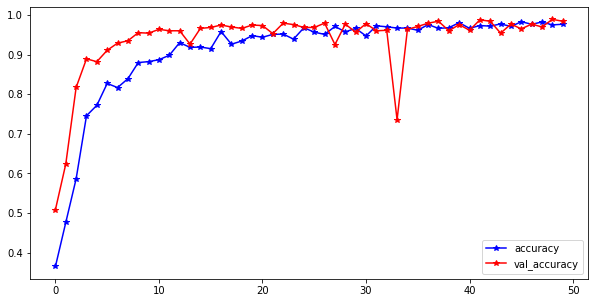

In [ ]:
# plotting accuracy and validation accuracy
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
plt.legend()

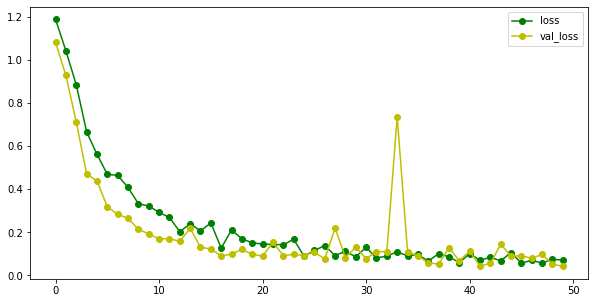

In [ ]:
plt.figure(figsize=(10,5)) 
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

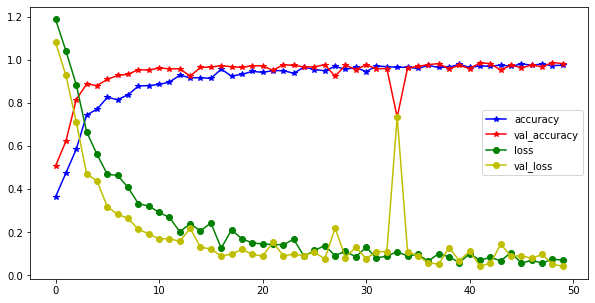

In [ ]:
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

Saving Rock-paper-scissors_(rock)_1.png to Rock-paper-scissors_(rock)_1.png
Rock


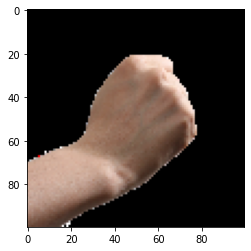

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(image_size, image_size))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')

In [ ]:
b = datetime.datetime.now().replace(microsecond=0)
print("total durasi runtime : {}".format(b-a))

total durasi runtime : 0:21:42


## Summarization

#####I tried both training the model with and without the augmentation. The augmented data learns better than the non augmented data. Why? Because In every iteration of the augmented data, it trains a different type of augmented data so the training learn so much type of pattern of dataset. While testing the model without augmented data, it gives overfitting result so when I use a data from non-dataset, the performance not quite good compared to model with augmented data.
#####I'm doing the hyperparameter to find which optimizer work the best and number of layers and units in dense layer works that gives me the best accuracy. For the optimizer, I use Adam, SGD, and RMSProp. Adam gave me a good and stable result and fast training time. SGD gave me a good result but not a stable result and slower training time. RMSProp also gave me a good result and faster than Adam. 2 hidden layers doesn't give me a significant comparison with 3 hidden layers layers, so I use 2 because I'm aware that using too many layers can leads to overfitting. I also use the dropout because it helps to prevent overfitting.